# «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»

# Задание 1 

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [4]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import math

In [5]:
delta = 3
sigma = math.sqrt(225)
beta = 0.95

alpha = 1 - beta
z_a = stats.norm.ppf(1 - alpha / 2)

n = (z_a * sigma / delta)**2
n

96.03647051735315

# Задание 2 
Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [21]:
population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

In [23]:
stats.ttest_ind(population_men,population_women)

Ttest_indResult(statistic=3.295554709710583, pvalue=0.0009822788540462975)

pvalue = 0.00098, при уровне значимости 0.001 различия между выборками значительно.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa364ac5110>]],
      dtype=object)

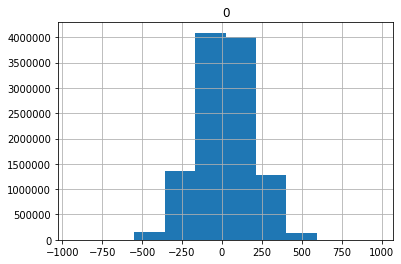

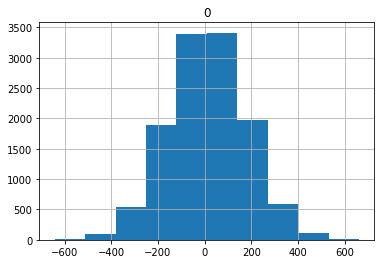

In [25]:
pd.DataFrame(population_men).hist()
pd.DataFrame(population_women).hist()

# Задание 3 
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

In [42]:
delta = 50
sigma = 150
beta = 0.95

alpha = 1 - beta
z_a = stats.norm.ppf(1 - alpha / 2)

n = (z_a * sigma / delta)**2
n

34.573129386247125

# Задание 4
Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [6]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [7]:
oddsratio, pvalue = stats.fisher_exact(observations)
pvalue

0.828664440194697

Нулевая гипотеза - маг не умеет предсказывать погоду.
pvalue > 5%, значит нулевая гипотеза не может быть отвергнута. Т.е. маг не умеет предсказывать погоду.

# Задание 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки:

In [30]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [31]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h

In [33]:
mean_confidence_interval(data, confidence=0.9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

# Задание 6
Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [37]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [38]:
stats.ttest_ind(data_1,data_2)

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

# Задание 7
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное, Альтернативная гипотеза - распределение не нормальное.

Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

p-value не говорит о нормальности распределения

# Задание 8

Первая выборка — это пациенты, которых лечили препаратом 

А. Вторая выборка — пациенты, которых лечили препаратом 

Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы?

In [44]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa34d4f4c10>]],
      dtype=object)

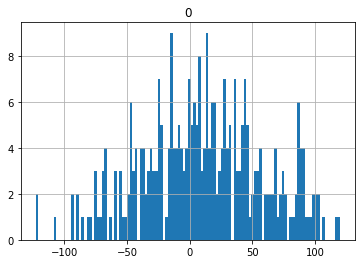

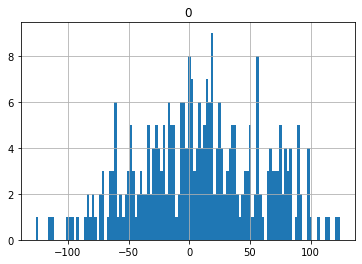

In [45]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)

In [46]:
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

Значимых различий в эффективности нет. Они были бы значимы при pvalue < 0.05